# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Caleb, Tanko**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Tweet Classification Challenge

<!-- The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.  -->

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# utilities
import numpy as np
import pandas as pd
import re

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

# sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Loaded train data into df_train DataFrame
df_train = pd.read_csv('train.csv')

In [3]:
#loaded test data into df_test DataFrame
df_test = pd.read_csv('test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Examine the Dataframe by calling the head() function

In [4]:
# calling the head function to display the FIVE top records of the data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


##### From the above cell, we can observe we have the sentiment (Label) ,  message and tweetid as features

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

In [5]:
#check if there are null values in our data
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

##### From the above Cell there are no null values in our dataframe

In [6]:
sentiment_types = list(df_train['sentiment'].unique())
sentiment_types

[1, 2, 0, -1]

##### from the above cell, we can identify four different sentiments;
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change


In [7]:
# Length of the dataset
print('length of data is', len(df_train))

length of data is 15819


In [8]:
# check the Shape of data

df_train.shape

(15819, 3)

### Data  Information

In [9]:
# Data Information

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Checking the datatypes of all columns

In [10]:
# Data types of all columns
df_train.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

### Let's have a look at how many data samples we have for each different sentiment types.

In [11]:
# calling the value_counts() method to get the number of samples in each sentiment
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

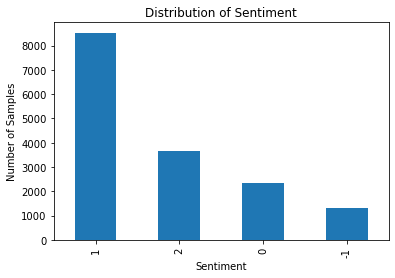

In [12]:
df_train['sentiment'].value_counts().plot(kind = 'bar', title= 'Distribution of Sentiment', xlabel='Sentiment', ylabel='Number of Samples')
plt.show

<AxesSubplot:xlabel='sentiment', ylabel='count'>

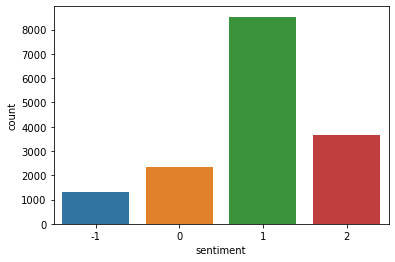

In [13]:
sns.countplot(x='sentiment', data=df_train)

#### From the above graph, we can conclude on the following;
* The sentiment types are not evenly distributed in our data.
* Pro(1) have over 8000 data samples represented as the highest
* Anti(-1) has the lowest data samples represented with a little above  1000 samples.


### Summary from EDA
 From the above exploratory Data Analysis, we observed the following;
 
   1. The data has three features(tweetid, message and sentiment)
   
   2. The data doesn't contain NULL values.
   
   3. The data contains four Unique sentiment types;
     * 2 News: the tweet links to factual news about climate change
     * 1 Pro: the tweet supports the belief of man-made climate change
     * 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
     * -1 Anti: the tweet does not believe in man-made climate change
     
   4. The total length of data is 15819.
   
   5. The tweetid and sentiment columns are numeric data types.
   
   6. The message column is an object data type.
   
   7. The data samples accross the sentiment types are inbalanced.

<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Preprocessing ⚡ |
| :--------------------------- |
| In this section the data would be sujected to different text preprocessing approach to aid better perfomance on our model. |

---

In [14]:
# Select the message and sentiment column for our further analysis
data = df_train[['message','sentiment']]

# select the message column in our test data
test_data = df_test['message']

### Converting text to lower case

In [15]:
# Making message text into lower case for train data
data['message'] = data['message'].str.lower()

data['message'].head(10)

0    polyscimajor epa chief doesn't think carbon di...
1    it's not like we lack evidence of anthropogeni...
2    rt @rawstory: researchers say we have three ye...
3    #todayinmaker# wired : 2016 was a pivotal year...
4    rt @soynoviodetodas: it's 2016, and a racist, ...
5    worth a read whether you do or don't believe i...
6    rt @thenation: mike pence doesn’t believe in g...
7    rt @makeandmendlife: six big things we can all...
8    @aceofspadeshq my 8yo nephew is inconsolable. ...
9    rt @paigetweedy: no offense… but like… how do ...
Name: message, dtype: object

In [16]:
# Making message text into lower case for test data
test_data = test_data.str.lower()

In [17]:
import emoji
def remove_emoji(data):
    tweet = ''.join(c for c in data if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    return tweet

In [18]:
# Using lambda function to apply the above function to the message column in our train data
data['message'] = data['message'].apply(lambda message: remove_emoji(message))
data['message'].head(10)

0    polyscimajor epa chief doesn't think carbon di...
1    it's not like we lack evidence of anthropogeni...
2    rt @rawstory: researchers say we have three ye...
3    #todayinmaker# wired : 2016 was a pivotal year...
4    rt @soynoviodetodas: it's 2016, and a racist, ...
5    worth a read whether you do or don't believe i...
6    rt @thenation: mike pence doesn’t believe in g...
7    rt @makeandmendlife: six big things we can all...
8    @aceofspadeshq my 8yo nephew is inconsolable. ...
9    rt @paigetweedy: no offense… but like… how do ...
Name: message, dtype: object

###  Removing all Stop Words in Text data

In [19]:
# defining the variable to store all stopwords
stopwords_list = stopwords.words('english')

In [20]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### removing the above stop words list from the tweet message with a function

In [21]:
STOPWORDS = set(stopwords_list)

# developed a function that removes stopwords from a text
def cleaning_stopwords(message):
    '''this function takes a in a message as input,
        uses list comprehension to generate a list 
        of words in input without stopwords, 
        the it is later joined together
    '''
    return " ".join([word for word in str(message).split() if word not in STOPWORDS])

In [22]:
# Using lambda function to apply the above function to the message column in our train data
data['message'] = data['message'].apply(lambda message: cleaning_stopwords(message))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt @rawstory: researchers say three years act ...
3    #todayinmaker# wired : 2016 pivotal year war c...
4    rt @soynoviodetodas: 2016, racist, sexist, cli...
5    worth read whether believe climate change http...
6    rt @thenation: mike pence doesn’t believe glob...
7    rt @makeandmendlife: six big things today figh...
8    @aceofspadeshq 8yo nephew inconsolable. wants ...
9    rt @paigetweedy: offense… like… believe… globa...
Name: message, dtype: object

In [23]:
# Using lambda function to apply the above function to the message column in our test data
test_data = test_data.apply(lambda message: cleaning_stopwords(message))

### Removing Punctuations from Text data

In [24]:
# Using the string library to import all available punctuations and declaring a variable to store all the punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [25]:
# a function that removes punctuations for a given text
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [26]:
#  Used a lambda function to apply the above  function to the message column in our train data
data['message']= data['message'].apply(lambda x: cleaning_punctuations(x))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt rawstory researchers say three years act cl...
3    todayinmaker wired  2016 pivotal year war clim...
4    rt soynoviodetodas 2016 racist sexist climate ...
5    worth read whether believe climate change http...
6    rt thenation mike pence doesn’t believe global...
7    rt makeandmendlife six big things today fight ...
8    aceofspadeshq 8yo nephew inconsolable wants di...
9    rt paigetweedy offense… like… believe… global ...
Name: message, dtype: object

In [27]:
#  Used a lambda function to apply the above  function to the message column in our test_data
test_data= test_data.apply(lambda x: cleaning_punctuations(x))

### Removing redundant characters in Text Data

In [28]:
# a function that removes repeating characters in a given text
def cleaning_redundant_char(text):
    cleaned = re.sub(r'(.)1+', r'1', text)
    return cleaned

In [29]:
#  Used a lambda function to apply the above  function to the message column in our train data

data['message'] = data['message'].apply(lambda x: cleaning_redundant_char(x))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt rawstory researchers say three years act cl...
3    todayinmaker wired  216 pivotal year war clima...
4    rt soynoviodetodas 216 racist sexist climate c...
5    worth read whether believe climate change http...
6    rt thenation mike pence doesn’t believe global...
7    rt makeandmendlife six big things today fight ...
8    aceofspadeshq 8yo nephew inconsolable wants di...
9    rt paigetweedy offense… like… believe… global ...
Name: message, dtype: object

In [30]:
#  Used a lambda function to apply the above  function to the message column in our test_data

test_data = test_data.apply(lambda x: cleaning_redundant_char(x))


### Removing URLs from Text Data

In [31]:
# a function that removes all URLs in a given text

def removing_URLs(data):
    cleaned = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
    return cleaned

In [32]:
#  Used a lambda function to apply the above  function to the message column in our train data

data['message'] = data['message'].apply(lambda x: removing_URLs(x))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt rawstory researchers say three years act cl...
3    todayinmaker wired  216 pivotal year war clima...
4    rt soynoviodetodas 216 racist sexist climate c...
5    worth read whether believe climate change http...
6    rt thenation mike pence doesn’t believe global...
7    rt makeandmendlife six big things today fight ...
8    aceofspadeshq 8yo nephew inconsolable wants di...
9    rt paigetweedy offense… like… believe… global ...
Name: message, dtype: object

In [33]:
#  Used a lambda function to apply the above  function to the message column in our test_data

test_data = test_data.apply(lambda x: removing_URLs(x))

### Removing Numbers from Text data

In [34]:
# a Function that removes numbers from a given text of data
def removing_numbers(data):
    cleaned = re.sub('[0-9]+', '', data)
    return cleaned

In [35]:
#  Used a lambda function to apply the above  function to the message column in our train data

data['message'] = data['message'].apply(lambda x: removing_numbers(x))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt rawstory researchers say three years act cl...
3    todayinmaker wired   pivotal year war climate ...
4    rt soynoviodetodas  racist sexist climate chan...
5    worth read whether believe climate change http...
6    rt thenation mike pence doesn’t believe global...
7    rt makeandmendlife six big things today fight ...
8    aceofspadeshq yo nephew inconsolable wants die...
9    rt paigetweedy offense… like… believe… global ...
Name: message, dtype: object

In [36]:
#  Used a lambda function to apply the above  function to the message column in our test_data

test_data = test_data.apply(lambda x: removing_numbers(x))

### Removing 'rt' from Text data

In [37]:
# A function that removes 'rt' from a given text data
def removing_rt(data):
    cleaned = re.sub('rt', '', data)
    return cleaned

In [38]:
#  Used a lambda function to apply the above  function to the message column in our train data

data['message'] = data['message'].apply(lambda x: removing_rt(x))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2     rawstory researchers say three years act clim...
3    todayinmaker wired   pivotal year war climate ...
4     soynoviodetodas  racist sexist climate change...
5    woh read whether believe climate change httpst...
6     thenation mike pence doesn’t believe global w...
7     makeandmendlife six big things today fight cl...
8    aceofspadeshq yo nephew inconsolable wants die...
9     paigetweedy offense… like… believe… global wa...
Name: message, dtype: object

In [39]:
#  Used a lambda function to apply the above  function to the message column in our test_data

test_data = test_data.apply(lambda x: removing_rt(x))


In [40]:
def delete_tags(data):
    """
        This function takes in a dataframe and a col, removes all words started with '#' and '@' in the column,
        and returns a new dataframe
    """
    
    pattern_tags = r'#\w+[#?]'
    pattern_2 = r'@\w+'
    pattern_3 = r'[0-9]+'
    pattern_4 = r'[^\x00-\x7f]' # Pattern for unicode
    subs_tag = ''
    data = data.replace(to_replace = pattern_tags, value = subs_tag, regex = True)
    data = data.replace(to_replace = pattern_2, value = subs_tag, regex = True)
    data = data.replace(to_replace = pattern_3, value = subs_tag, regex = True)
    data = data.replace(to_replace = pattern_4, value = subs_tag, regex = True) # Where it is being removed
    return data

In [41]:
data['message'] = delete_tags(data['message'])
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2     rawstory researchers say three years act clim...
3    todayinmaker wired   pivotal year war climate ...
4     soynoviodetodas  racist sexist climate change...
5    woh read whether believe climate change httpst...
6     thenation mike pence doesnt believe global wa...
7     makeandmendlife six big things today fight cl...
8    aceofspadeshq yo nephew inconsolable wants die...
9      paigetweedy offense like believe global warming
Name: message, dtype: object

In [42]:
test_data = delete_tags(test_data)

In [43]:
# Using lambda function to apply the above function to the message column in our train data
data['message'] = data['message'].apply(lambda message: cleaning_stopwords(message))
data['message'].head(10)

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rawstory researchers say three years act clima...
3    todayinmaker wired pivotal year war climate ch...
4    soynoviodetodas racist sexist climate change d...
5    woh read whether believe climate change httpst...
6    thenation mike pence doesnt believe global war...
7    makeandmendlife six big things today fight cli...
8    aceofspadeshq yo nephew inconsolable wants die...
9      paigetweedy offense like believe global warming
Name: message, dtype: object

In [44]:
# def seperate_words(data):
    

# #separate the words
#     tweet = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",data)])
#     return tweet

In [45]:
# # Using lambda function to apply the above function to the message column in our train data
# data['message'] = seperate_words(data['message'])

### Tokenization of Text data

In [46]:
# Tokenization of the tweet message column of our train data
tokeniser = TreebankWordTokenizer()
data['message'] = data['message'].apply(tokeniser.tokenize)
data['message'].head(10)

0    [polyscimajor, epa, chief, think, carbon, diox...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rawstory, researchers, say, three, years, act...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [soynoviodetodas, racist, sexist, climate, cha...
5    [woh, read, whether, believe, climate, change,...
6    [thenation, mike, pence, doesnt, believe, glob...
7    [makeandmendlife, six, big, things, today, fig...
8    [aceofspadeshq, yo, nephew, inconsolable, want...
9    [paigetweedy, offense, like, believe, global, ...
Name: message, dtype: object

In [47]:
# Tokenization of the tweet message column of our test data
tokeniser = TreebankWordTokenizer()
test_data = test_data.apply(tokeniser.tokenize)


### Lemmatization of Text Data

In [48]:
# Applying Lemmatizer on our data

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer() # instantiate the lemmatizer object

# A function that appllies Lemmatization on a given text data
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text


In [49]:
#  Used a lambda function to apply the above  function to the message column in our train data

data['message'] = data['message'].apply(lambda x: lemmatizer_on_text(x))
data['message'].head(10)

0    [polyscimajor, epa, chief, think, carbon, diox...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rawstory, researcher, say, three, year, act, ...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [soynoviodetodas, racist, sexist, climate, cha...
5    [woh, read, whether, believe, climate, change,...
6    [thenation, mike, penny, doesnt, believe, glob...
7    [makeandmendlife, six, big, thing, today, figh...
8    [aceofspadeshq, yo, nephew, inconsolable, want...
9    [paigetweedy, offense, like, believe, global, ...
Name: message, dtype: object

In [50]:
#  Used a lambda function to apply the above  function to the message column in our test_data

test_data = test_data.apply(lambda x: lemmatizer_on_text(x))


### Resampling of Data
 
 Recall from our Exploratory Data Analysis, we observed that the distribution of sentiment in the data is imbalanced.
 Hence the need for Resampling.
 SKlearn would be used to achieve this process

In [51]:
from sklearn.utils import resample

#divide data into dataframe of majority and minority class with 4000 as the benchmark
df_majority = data[(data['sentiment']==1)] # majority as it has a value greater than benchmark
df_minority1 = data[(data['sentiment']==2)] # minority as it has a value lesser than benchmark
df_minority2 = data[(data['sentiment']==0)] # minority as it has a value lesser than benchmark
df_minority3 = data[(data['sentiment']==-1)] # minority as it has a value lesser than benchmark

# upsample minority class
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8530, # to match majority class
                                 random_state=42)  # reproducible results

df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8530, # to match majority class
                                 random_state=42) 

df_minority_upsampled3 = resample(df_minority3, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8530, # to match majority class
                                 random_state=42) 


# Combine majority class with upsampled minority classes using pd.concat
data_upsampled = pd.concat([df_minority_upsampled1, df_minority_upsampled2, df_minority_upsampled3, df_majority])

In [52]:
# check the value_counts of sentiments values
data_upsampled['sentiment'].value_counts()

 0    8530
 1    8530
 2    8530
-1    8530
Name: sentiment, dtype: int64

##### * from the above we can see that our sentiment distribution is now balanced

In [53]:
# Length of the dataset
print('length of data is', len(data_upsampled))

length of data is 34120


* from the above cell, we observe a significant increase in our data.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, different models were trained and used to predict classes of our test data |

---

In [54]:
# Seperate the train data into X and y
X = data_upsampled.message
y = data_upsampled.sentiment

#### Splitting our data into Train and Test Subset

In [55]:
# Using the train_test_split model of sklearn to split our data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

#### Transforming data using TF-IDF VEctorizer

In [56]:
# Instantiating the TF-IDF vectorizer object to a variable tt
tt = TfidfVectorizer(preprocessor=list, tokenizer=list, ngram_range=(1,2),min_df=2, strip_accents = 'ascii', smooth_idf=False)

# A function that vectorise a given text of data input
def vectorise(X_train, X_test, test_data):
    '''
    This function takes in three input, two from our train data and one from the test data,
    fits and transforms the data.
    The function returns an output of the vectorised inputs
    '''
    tt.fit(X_train)
    X_train = tt.transform(X_train)
    X_test = tt.transform(X_test)
    test_data = tt.transform(test_data)
    
    return X_train, X_test, test_data

In [57]:
# Apply the vectorise funtion on X_train, X_test, test_data
X_train, X_test, test_data = vectorise(X_train, X_test, test_data)

#### Funtion to Evalute models

In [58]:
# a funtion that evaluates the model based on classifcation report of SKlearn
def model_Evaluate(model):
    '''
    This functions the input of a model name, 
    get the predictions for X_test,
    and evaluates the perfomance of the model with the classification report
    '''
    y_pred = model.predict(X_test) # get predict values for Test dataset

    return print(classification_report(y_test, y_pred)) # Print the evaluation metrics for the dataset.
    

### First Model

In [59]:
# instantiating the model, training the model, calling the evaluation functon on the model and getting predictions from the model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train) 
model_Evaluate(BNBmodel) 
y_pred = BNBmodel.predict(X_test)
#y_pred1 = BNBmodel.predict(test_data) 

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1671
           0       0.95      0.84      0.89      1722
           1       0.75      0.90      0.82      1724
           2       0.93      0.85      0.89      1707

    accuracy                           0.89      6824
   macro avg       0.90      0.89      0.89      6824
weighted avg       0.90      0.89      0.89      6824



In [64]:
y_pred1.shape

(10546,)

### Second Model

In [75]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1671
           0       0.96      0.97      0.97      1722
           1       0.92      0.90      0.91      1724
           2       0.94      0.94      0.94      1707

    accuracy                           0.95      6824
   macro avg       0.95      0.95      0.95      6824
weighted avg       0.95      0.95      0.95      6824



### Third Model

In [61]:
# instantiating the model, training the model, calling the evaluation functon on the model and getting predictions from the model

from sklearn.naive_bayes import MultinomialNB
M_NB = MultinomialNB(alpha=0.1)
M_NB.fit(X_train, y_train)
model_Evaluate(M_NB)
y_pred3= M_NB.predict(test_data)

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1671
           0       0.96      0.92      0.94      1722
           1       0.86      0.89      0.87      1724
           2       0.93      0.91      0.92      1707

    accuracy                           0.93      6824
   macro avg       0.93      0.93      0.93      6824
weighted avg       0.93      0.93      0.93      6824



In [ ]:
def kaggle_submission(y_pred_value):
    
    tweetid = df_test['tweetid'] 
    my_dict = {'tweetid': tweetid,'sentiment':y_pred_value}
    new_pandas = pd.DataFrame(my_dict)
    return new_pandas.to_csv('file_13.csv',index=False)

In [70]:
kaggle_submission(y_pred2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
model_Evaluate(forest)
y_pred4 = forest.predict(test_data)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(random_state=42)
# tree.fit(X_train, y_train)
# model_Evaluate(tree)
# y_pred5 = tree.predict(X_test)

In [ ]:
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_train, y_train)

In [ ]:
# print(clf.best_params_)

In [ ]:
# print(clf.best_score_)

In [65]:
y_test.shape

(6824,)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [76]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="LOfWnyJWVQ0yynqkHLhoe1J2B",
    project_name="edsa-climate-change-belief-analysis-2022",
    workspace="moreira",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\hp 840\\Documents\\EXPLORE ACADEMY\\SPRINTS\\Advanced Classification\\Kaggle Competition' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/moreira/edsa-climate-change-belief-analysis-2022/7a76d030909f4b20920aa5388ca72ff0



In [77]:
# Saving each metric to add to a dictionary for logging
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred, average = 'macro')
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')

In [78]:
# Create dictionaries for the data we want to log

# params = {"random_state": 7,
#           "model_type": "Linear",
#           "scaler": "standard scaler",
#           "param_grid": str(param_grid),
#           "stratify": True
#           }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [80]:
# Log our parameters and results
#experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [81]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/moreira/edsa-climate-change-belief-analysis-2022/7a76d030909f4b20920aa5388ca72ff0
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.890906548581185
COMET INFO:     precision : 0.8984401931861216
COMET INFO:     recall    : 0.8889524439516074
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functional

In [82]:
experiment.display()